# Lab Activity Week 6

**Homework** Anything you do not complete in lab is your homework. Please provide a link to your github repository as your homework submission.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 1 - Review: Comparing Indoor vs Outdoor data
- Cut out any data that was part of your outdoor data set that was not taken outdoors or take a new outdoor data set that runs for an extra 30s to give you time to get outside and then cut out that 30s interval
  - Recall we learned methods for slicing dataframes in week 2
- Now produce histogram plots that compare indoors vs outdoors for each of your data types - don't forget labels
- Compare the mean and standard deviation values for each set of indoor data versus outdoor data, are they in agreement?
  - NOTE: The variance in your data is not the uncertainty on the mean (central limit theorem)
  - what is your mean uncertainty?
  - How many inside mean standard deviations (1 sigma uncertainty) are your inside and outside measurements separated by?
- If your distributions were not well described by a Gaussian, do you think you took enough data for the central limit theorem to apply?

In [3]:
# our OutsideData.csv is already solely outdoors, so we are good to go!

outdoors = pd.read_csv("OutsideData.csv")
outdoors

,Time,Temperature,Gas,Relative_Humididty,Pressure,Altitude,PM1,PM2.5,PM10
0,1.708129e+09,33.914766,356969,100.000000,698.528280,3029.237108,3,4,4
1,1.708129e+09,26.556758,41200,37.807000,1008.371439,40.696758,3,4,4
2,1.708129e+09,26.581758,54746,37.749602,1008.369829,40.710220,3,4,4
3,1.708129e+09,26.610469,70891,37.668621,1008.381344,40.613969,3,4,4
4,1.708129e+09,26.638203,87236,37.575588,1008.377120,40.649275,3,4,4
...,...,...,...,...,...,...,...,...,...
351,1.708129e+09,17.556953,513185,54.298775,1007.642924,46.787681,5,7,8
352,1.708129e+09,17.557734,513185,54.298875,1007.649440,46.733181,5,7,8
353,1.708129e+09,17.559297,512795,54.299075,1007.648530,46.740793,5,7,8
354,1.708129e+09,17.554219,512795,54.298426,1007.640159,46.810801,5,7,8


This is for PM1!

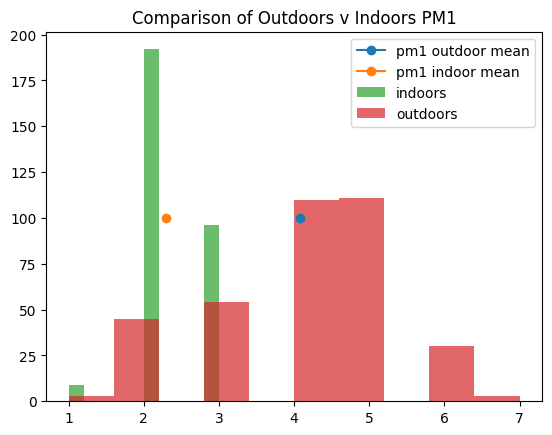

In [4]:
indoors = pd.read_csv("InsideData.csv")
pm1_outdoor_mean = np.mean(outdoors['PM1'])
pm1_indoor_mean = np.mean(indoors['PM1'])
pm1_outdoor_std = np.std(outdoors['PM1'])
pm1_indoor_std = np.std(indoors['PM1'])
plt.plot(pm1_outdoor_mean, 100, label = 'pm1 outdoor mean', marker = 'o')
plt.plot(pm1_indoor_mean, 100, label = 'pm1 indoor mean', marker = 'o')
plt.hist(indoors['PM1'], alpha = 0.7, label = 'indoors')
plt.hist(outdoors['PM1'], alpha = 0.7, label = 'outdoors')
plt.title("Comparison of Outdoors v Indoors PM1")
plt.legend()
plt.show()

In [5]:
pm1_outdoor_mean = np.mean(outdoors['PM1'])
pm1_indoor_mean = np.mean(indoors['PM1'])
pm1_outdoor_std = np.std(outdoors['PM1'])
pm1_indoor_std = np.std(indoors['PM1'])
pm1_outdoor_unc = pm1_outdoor_std/np.sqrt(len(outdoors['PM1']))
pm1_indoor_unc = pm1_indoor_std/np.sqrt(len(indoors['PM1']))
print("The outdoor mean for PM1 is", pm1_outdoor_mean, "and the outdoor std is", pm1_outdoor_std, ". The uncertainty is", pm1_outdoor_unc, ". The distribution is not Gaussian.")
print("The indoor mean for PM1 is", pm1_indoor_mean, "and the indoor std is", pm1_indoor_std, ". The uncertainty is", pm1_indoor_unc, ". The distribution seems Gaussian.")
#uncertainty = sd/sqrt(num stuff)

The outdoor mean for PM1 is 4.075842696629214 and the outdoor std is 1.2050365363371083 . The uncertainty is 0.0638668086923771 . The distribution is not Gaussian.
The indoor mean for PM1 is 2.292929292929293 and the indoor std is 0.5174241808026544 . The uncertainty is 0.030023996176307757 . The distribution seems Gaussian.


Our indoor and outdoor means are separated by many sigma uncertainties. They are separated by 21.6 sigmas if we use the outdoor uncertainty and 43.3 sigmas if we use indoor uncertainty.

This is for PM2.5

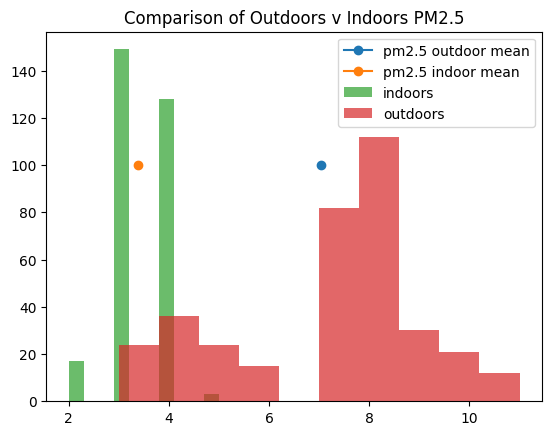

In [6]:
pm25_outdoor_mean = np.mean(outdoors['PM2.5'])
pm25_indoor_mean = np.mean(indoors['PM2.5'])
pm25_outdoor_std = np.std(outdoors['PM2.5'])
pm25_indoor_std = np.std(indoors['PM2.5'])
plt.plot(pm25_outdoor_mean, 100, label = 'pm2.5 outdoor mean', marker = 'o')
plt.plot(pm25_indoor_mean, 100, label = 'pm2.5 indoor mean', marker = 'o')
plt.hist(indoors['PM2.5'], alpha = 0.7, label = 'indoors')
plt.hist(outdoors['PM2.5'], alpha = 0.7, label = 'outdoors')
plt.title("Comparison of Outdoors v Indoors PM2.5")
plt.legend()
plt.show()

In [7]:
pm25_outdoor_unc = pm25_outdoor_std/np.sqrt(len(outdoors['PM2.5']))
pm25_indoor_unc = pm25_indoor_std/np.sqrt(len(indoors['PM2.5']))
print("The outdoor mean for PM1 is", pm25_outdoor_mean, "and the outdoor std is", pm25_outdoor_std, ". The uncertainty is", pm25_outdoor_unc, ". The distribution is not Gaussian.")
print("The indoor mean for PM1 is", pm25_indoor_mean, "and the indoor std is", pm25_indoor_std, ". The uncertainty is", pm25_indoor_unc, ". The distribution doesn't seem Gaussian.")

The outdoor mean for PM1 is 7.044943820224719 and the outdoor std is 2.005106471770506 . The uncertainty is 0.10627043046318843 . The distribution is not Gaussian.
The indoor mean for PM1 is 3.393939393939394 and the indoor std is 0.6110902408991585 . The uncertainty is 0.03545905223770941 . The distribution doesn't seem Gaussian.


The means are separated by many uncertainties/sigmas. If we use the outdoor uncertainty, they have a 36.5 sigma difference and a 12.16 sigma difference with indoor uncertainty.

This is for PM10!

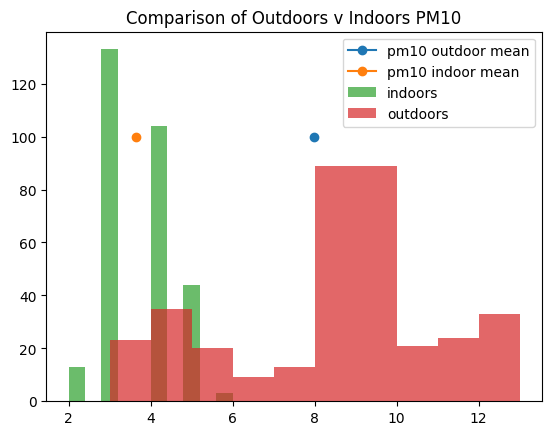

In [8]:
pm10_outdoor_mean = np.mean(outdoors['PM10'])
pm10_indoor_mean = np.mean(indoors['PM10'])
pm10_outdoor_std = np.std(outdoors['PM10'])
pm10_indoor_std = np.std(indoors['PM10'])
plt.plot(pm10_outdoor_mean, 100, label = 'pm10 outdoor mean', marker = 'o')
plt.plot(pm10_indoor_mean, 100, label = 'pm10 indoor mean', marker = 'o')
plt.hist(indoors['PM10'], alpha = 0.7, label = 'indoors')
plt.hist(outdoors['PM10'], alpha = 0.7, label = 'outdoors')
plt.legend()
plt.title("Comparison of Outdoors v Indoors PM10")
plt.show()

In [9]:
pm10_outdoor_unc = pm25_outdoor_std/np.sqrt(len(outdoors['PM10']))
pm10_indoor_unc = pm25_indoor_std/np.sqrt(len(indoors['PM10']))
print("The outdoor mean for PM1 is", pm10_outdoor_mean, "and the outdoor std is", pm10_outdoor_std, ". The uncertainty is", pm10_outdoor_unc, ". The distribution is a bit Gaussian.")
print("The indoor mean for PM1 is", pm10_indoor_mean, "and the indoor std is", pm10_indoor_std, ". The uncertainty is", pm10_indoor_unc, ". The distribution doesn't seem Gaussian.")

The outdoor mean for PM1 is 7.99438202247191 and the outdoor std is 2.575810532434917 . The uncertainty is 0.10627043046318843 . The distribution is a bit Gaussian.
The indoor mean for PM1 is 3.632996632996633 and the indoor std is 0.8226520163811691 . The uncertainty is 0.03545905223770941 . The distribution doesn't seem Gaussian.


The outdoor and indoor means are separated by many sigmas. If we use the outdoor uncertainty, they are separated by 44 sigmas. If we use the indoor uncertainty, they are separated by 12.6 sigmas.

Since we don't see any of the graphs truly having a Gaussian shape, it means that we didn't collect enough data.

### Step 2: Comparing sensors
- Get inside/outside data from another group in your lab and compare your inside data with their inside data, including all of elements from Step 1. - Do the same statistical comparison of your outside data with the outside data from the other group.
- How do the sensors compare? What do you think this indicates about the accuracy and precision of your sensors?

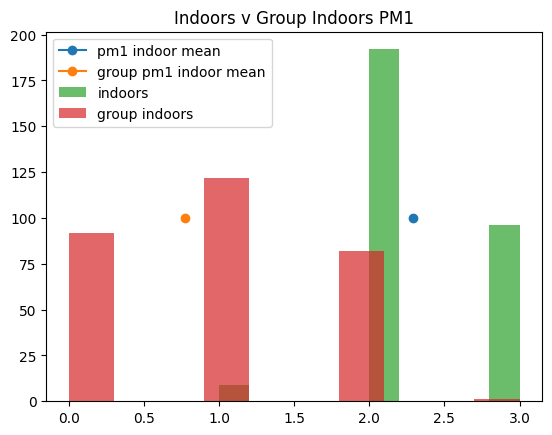

In [10]:
group_inside = pd.read_csv('weather_data_inside (1).csv')

#For PM 1: 

indoors = pd.read_csv("InsideData.csv")
pm1_indoor_mean = np.mean(indoors['PM1'])
pm1_indoor_std = np.std(indoors['PM1'])
group_pm1_indoor_mean = np.mean(group_inside['PM1.0'])
group_pm1_indoor_mean = np.std(group_inside['PM1.0'])
plt.plot(pm1_indoor_mean, 100, label = 'pm1 indoor mean', marker = 'o')
plt.plot(group_pm1_indoor_mean, 100, label = 'group pm1 indoor mean', marker = 'o')
plt.hist(indoors['PM1'], alpha = 0.7, label = 'indoors')
plt.hist(group_inside['PM1.0'], alpha = 0.7, label = 'group indoors')
plt.title("Indoors v Group Indoors PM1")
plt.legend()
plt.show()


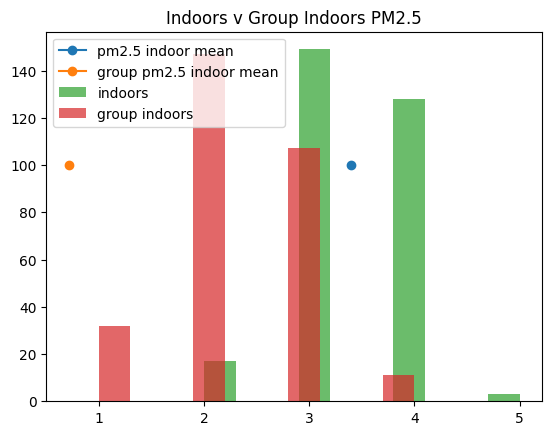

In [11]:
#For PM 2.5: 
indoors = pd.read_csv("InsideData.csv")
pm1_indoor_mean = np.mean(indoors['PM2.5'])
pm1_indoor_std = np.std(indoors['PM2.5'])
group_pm1_indoor_mean = np.mean(group_inside['PM2.5'])
group_pm1_indoor_mean = np.std(group_inside['PM2.5'])
plt.plot(pm1_indoor_mean, 100, label = 'pm2.5 indoor mean', marker = 'o')
plt.plot(group_pm1_indoor_mean, 100, label = 'group pm2.5 indoor mean', marker = 'o')
plt.hist(indoors['PM2.5'], alpha = 0.7, label = 'indoors')
plt.hist(group_inside['PM2.5'], alpha = 0.7, label = 'group indoors')
plt.title("Indoors v Group Indoors PM2.5")
plt.legend()
plt.show()

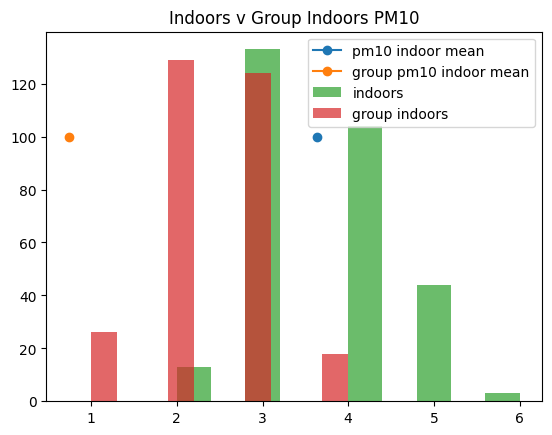

In [12]:
#For PM 10: 
indoors = pd.read_csv("InsideData.csv")
pm1_indoor_mean = np.mean(indoors['PM10'])
pm1_indoor_std = np.std(indoors['PM10'])
group_pm1_indoor_mean = np.mean(group_inside['PM10'])
group_pm1_indoor_mean = np.std(group_inside['PM10'])
plt.plot(pm1_indoor_mean, 100, label = 'pm10 indoor mean', marker = 'o')
plt.plot(group_pm1_indoor_mean, 100, label = 'group pm10 indoor mean', marker = 'o')
plt.hist(indoors['PM10'], alpha = 0.7, label = 'indoors')
plt.hist(group_inside['PM10'], alpha = 0.7, label = 'group indoors')
plt.title("Indoors v Group Indoors PM10")
plt.legend()
plt.show()

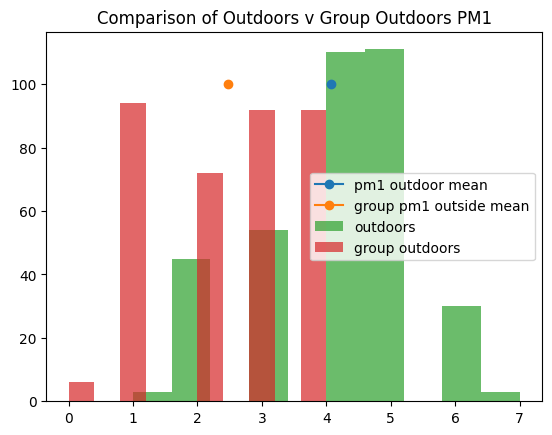

In [13]:
group_outside = pd.read_csv('weather_quality_outside (1).csv')

#PM 1
outdoors = pd.read_csv("OutsideData.csv")
pm25_outdoor_mean = np.mean(outdoors['PM1'])
pm25_group_outside_mean = np.mean(group_outside['PM1.0'])
pm25_outdoor_std = np.std(outdoors['PM1'])
pm25_group_outside_std = np.std(group_outside['PM1.0'])
plt.plot(pm25_outdoor_mean, 100, label = 'pm1 outdoor mean', marker = 'o')
plt.plot(pm25_group_outside_mean, 100, label = 'group pm1 outside mean', marker = 'o')
plt.hist(outdoors['PM1'], alpha = 0.7, label = 'outdoors')
plt.hist(group_outside['PM1.0'], alpha = 0.7, label = 'group outdoors')
plt.title("Comparison of Outdoors v Group Outdoors PM1")
plt.legend()
plt.show()

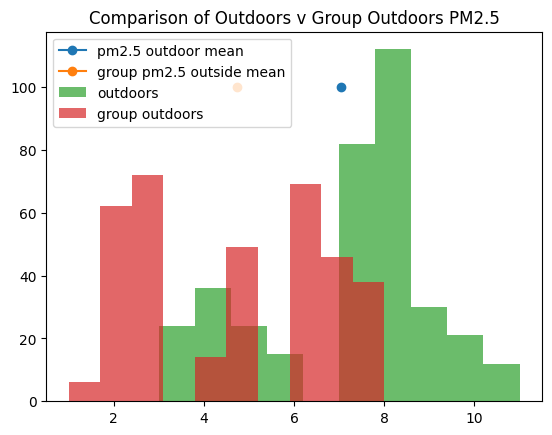

In [14]:
#PM 2.5
outdoors = pd.read_csv("OutsideData.csv")
pm25_outdoor_mean = np.mean(outdoors['PM2.5'])
pm25_group_outside_mean = np.mean(group_outside['PM2.5'])
pm25_outdoor_std = np.std(outdoors['PM2.5'])
pm25_group_outside_std = np.std(group_outside['PM2.5'])
plt.plot(pm25_outdoor_mean, 100, label = 'pm2.5 outdoor mean', marker = 'o')
plt.plot(pm25_group_outside_mean, 100, label = 'group pm2.5 outside mean', marker = 'o')
plt.hist(outdoors['PM2.5'], alpha = 0.7, label = 'outdoors')
plt.hist(group_outside['PM2.5'], alpha = 0.7, label = 'group outdoors')
plt.title("Comparison of Outdoors v Group Outdoors PM2.5")
plt.legend()
plt.show()

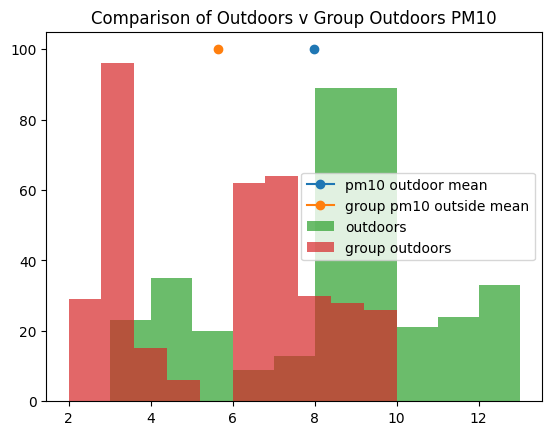

In [15]:
#PM 10
outdoors = pd.read_csv("OutsideData.csv")
pm25_outdoor_mean = np.mean(outdoors['PM10'])
pm25_group_outside_mean = np.mean(group_outside['PM10'])
pm25_outdoor_std = np.std(outdoors['PM10'])
pm25_group_outside_std = np.std(group_outside['PM10'])
plt.plot(pm25_outdoor_mean, 100, label = 'pm10 outdoor mean', marker = 'o')
plt.plot(pm25_group_outside_mean, 100, label = 'group pm10 outside mean', marker = 'o')
plt.hist(outdoors['PM10'], alpha = 0.7, label = 'outdoors')
plt.hist(group_outside['PM10'], alpha = 0.7, label = 'group outdoors')
plt.title("Comparison of Outdoors v Group Outdoors PM10")
plt.legend()
plt.show()

There is a clear difference between our data, and the other group's (Max, Arjun, Alik)'s data for both outdoor and indoor scenarios. In indoor scenarios, our counts were more sensitive, which is indicated by the higher mean in the first three graphs. On the other hand, the outside graph displays the opposite, where the Max's group had a higher rates of ppm detection. 

Taking this into account of the accuracy and precision of the sensors, the sensors often hold inaccurate readings. This is mostly shown by looking at the inside data, where the group and our data were under the same environment and our detectors leading different results. In terms of precision, both detectors express a marginally higher precision, which is shown by the similar shape of each histogram throughout the indoor data.

### Step 3: More locations
- Consider other areas you could take your sensors where you might find a larger change in the data: for example, is there somewhere near lab where the air quality might be significantly worse?
- Set up your system to be able to run in a way that would allow you to get to that location and take ~5 minutes of data.
  - This might require adding additional input arguments, like a delayed start time, or changing to running indefinitely but making sure that your data is being collected and saved even if your script does not run gracefully.
- Compare this new set of data with your other outdoor data, including the same set of graphs and statistical comparisons made for earlier steps.

In [16]:
# we are importing the musty crusty Hearst parking lot radiation data
bad = pd.read_csv("Bad_Outside_Data.csv")
bad = bad.iloc[279:]
bad

,Time,Temperature,Gas,Relative_Humididty,Pressure,Altitude,PM1,PM2.5,PM10
279,1.708733e+09,20.716523,474877,34.761169,1005.423094,65.369083,0,0,0
280,1.708733e+09,20.720820,474209,34.738254,1005.428385,65.324754,0,0,0
281,1.708733e+09,20.723945,476892,34.721060,1005.424750,65.355213,0,0,0
282,1.708733e+09,20.727461,474209,34.709731,1005.428760,65.321612,0,0,0
283,1.708733e+09,20.727266,475547,34.686407,1005.426689,65.338968,0,0,0
...,...,...,...,...,...,...,...,...,...
575,1.708733e+09,20.692695,497657,35.144141,1005.210654,67.149089,0,1,1
576,1.708733e+09,20.684883,498393,35.131725,1005.210111,67.153637,0,1,2
577,1.708733e+09,20.674531,495828,35.130759,1005.205407,67.193053,0,1,2
578,1.708733e+09,20.669648,496924,35.124461,1005.199157,67.245428,0,1,2


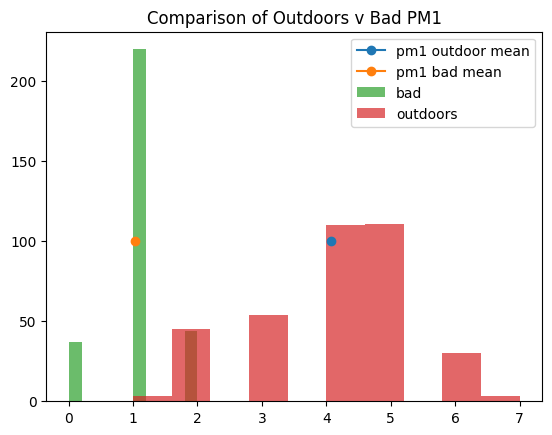

In [17]:
pm1_outdoor_mean = np.mean(outdoors['PM1'])
pm1_bad_mean = np.mean(bad['PM1'])
pm1_outdoor_std = np.std(outdoors['PM1'])
pm1_bad_std = np.std(bad['PM1'])
plt.plot(pm1_outdoor_mean, 100, label = 'pm1 outdoor mean', marker = 'o')
plt.plot(pm1_bad_mean, 100, label = 'pm1 bad mean', marker = 'o')
plt.hist(bad['PM1'], alpha = 0.7, label = 'bad')
plt.hist(outdoors['PM1'], alpha = 0.7, label = 'outdoors')
plt.title("Comparison of Outdoors v Bad PM1")
plt.legend()
plt.show()

For PM1 comparison, Outdoor seems kinda Gaussian, but Bad is definitely not.

In [18]:
pm1_bad_std = np.std(indoors['PM1'])
pm1_outdoor_unc = pm1_outdoor_std/np.sqrt(len(outdoors['PM1']))
pm1_bad_unc = pm1_bad_std/np.sqrt(len(indoors['PM1']))
print("The outdoor mean for PM1 is", pm1_outdoor_mean, "and the outdoor std is", pm1_outdoor_std, ". The uncertainty is", pm1_outdoor_unc, ". The distribution is Gaussian.")
print("The bad mean for PM1 is", pm1_bad_mean, "and the bad std is", pm1_bad_std, ". The uncertainty is", pm1_bad_unc, ". The distribution is not Gaussian.")

The outdoor mean for PM1 is 4.075842696629214 and the outdoor std is 1.2050365363371083 . The uncertainty is 0.0638668086923771 . The distribution is Gaussian.
The bad mean for PM1 is 1.0232558139534884 and the bad std is 0.5174241808026544 . The uncertainty is 0.030023996176307757 . The distribution is not Gaussian.


Using the uncertainty from the bad area's data, there is a 100 sigma difference between outdoor and bad means. Using the uncertainty from the outdoor area's data, there is a 50 sigma difference between outdoor and ban means.

PM2.5 comparisons!

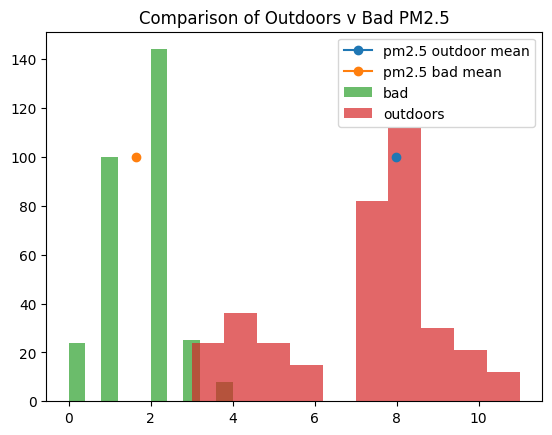

In [19]:
pm25_bad_mean = np.mean(bad['PM2.5'])
pm25_bad_std = np.std(bad['PM2.5'])
plt.plot(pm25_outdoor_mean, 100, label = 'pm2.5 outdoor mean', marker = 'o')
plt.plot(pm25_bad_mean, 100, label = 'pm2.5 bad mean', marker = 'o')
plt.hist(bad['PM2.5'], alpha = 0.7, label = 'bad')
plt.hist(outdoors['PM2.5'], alpha = 0.7, label = 'outdoors')
plt.title("Comparison of Outdoors v Bad PM2.5")
plt.legend()
plt.show()

The Bad data seems to adopt a Gaussian shape, while the outdoors does not. Interesting.

In [20]:
pm1_outdoor_unc = pm1_outdoor_std/np.sqrt(len(outdoors['PM1']))
pm25_bad_unc = pm25_bad_std/np.sqrt(len(indoors['PM1']))
print("The outdoor mean for PM2.5 is", pm25_outdoor_mean, "and the outdoor std is", pm25_outdoor_std, ". The uncertainty is", pm25_outdoor_unc, ". The distribution is not Gaussian.")
print("The bad mean for PM2.5 is", pm25_bad_mean, "and the bad std is", pm25_bad_std, ". The uncertainty is", pm25_bad_unc, ". The distribution seems Gaussian.")

The outdoor mean for PM2.5 is 7.99438202247191 and the outdoor std is 2.575810532434917 . The uncertainty is 0.10627043046318843 . The distribution is not Gaussian.
The bad mean for PM2.5 is 1.6445182724252492 and the bad std is 0.8450824236855626 . The uncertainty is 0.049036655801514215 . The distribution seems Gaussian.


If we use the uncertainty of the bad mean, then there is a 10.93 sigma difference between the bad mean and the outdoor mean.

If we use the uncertainty of the outdoor mean, there is a 53.6 sigma difference between the bad mean and outdoor mean.

PM10 time!

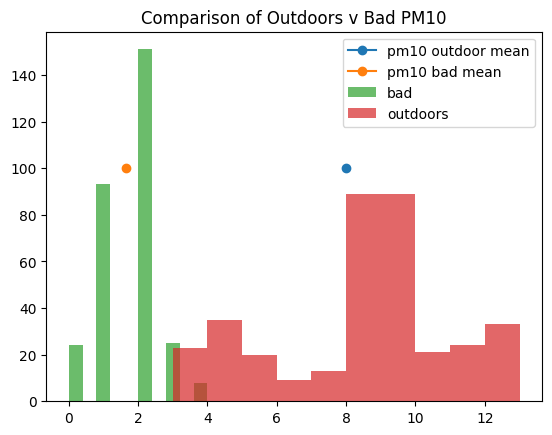

In [21]:
pm10_bad_mean = np.mean(bad['PM10'])
pm10_bad_std = np.std(bad['PM10'])
plt.plot(pm10_outdoor_mean, 100, label = 'pm10 outdoor mean', marker = 'o')
plt.plot(pm10_bad_mean, 100, label = 'pm10 bad mean', marker = 'o')
plt.hist(bad['PM10'], alpha = 0.7, label = 'bad')
plt.hist(outdoors['PM10'], alpha = 0.7, label = 'outdoors')
plt.legend()
plt.title("Comparison of Outdoors v Bad PM10")
plt.show()

In [22]:
pm10_outdoor_unc = pm25_outdoor_std/np.sqrt(len(outdoors['PM10']))
pm10_bad_unc = pm10_bad_std/np.sqrt(len(bad['PM10']))
print("The outdoor mean for PM1 is", pm10_outdoor_mean, "and the outdoor std is", pm10_outdoor_std, ". The uncertainty is", pm10_outdoor_unc, ". The distribution doesn't seem Gaussian.")
print("The bad mean for PM1 is", pm10_bad_mean, "and the indoor std is", pm10_bad_std, ". The uncertainty is", pm10_bad_unc, ". The distribution seems Gaussian.")

The outdoor mean for PM1 is 7.99438202247191 and the outdoor std is 2.575810532434917 . The uncertainty is 0.1365176851839533 . The distribution doesn't seem Gaussian.
The bad mean for PM1 is 1.6677740863787376 and the indoor std is 0.8407744583577829 . The uncertainty is 0.04846143412478944 . The distribution seems Gaussian.


The PM10 bad and outdoor mean have a 13.1875 sigma difference, when using the outdoor uncertainty.

The PM10 bad and outdoor mean have a 59.5652 sigma difference, when using the bad area uncertainty.

### Step 4: Correlations in data
- Plot temperature vs humidity
  - NOTE: These were taken by the same sensor at the same time, so each measurement matches up in time, meaning plotting one versus the other works. 
  - What is the hidden variable that is important when making plots like this?
- What does this plot show? Are temperature and humidity correlated? How would you quantify this?
  - HINT: there are linear correlation comparisons you can make mathematically such as the Pearson's correlation or similar (linear $R^2$), is the correlation you are seeing linear? Can you implement these in code?
- Plot temperature vs another property measured by that sensor, are they correlated? Is the correlation qualitatively similar to what you see from temperature vs humidity?
  - try this for all data types (temp. vs pressure, temp. vs voc, etc.)
  
- Plot temperature vs PM2.5 concentration and discuss as with the previous comparisons.
  - This will require coming up with a way to ensure that the times match between sensors, what about the way you are collecting data ensures that this is true?
 

303187.30810025637
126736
2.3922745557714964


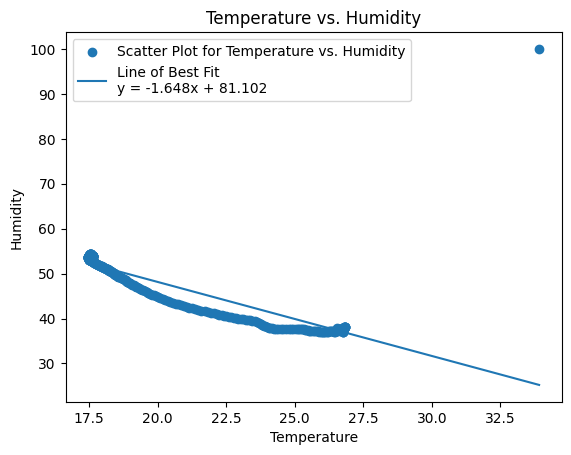

In [55]:
# For this problem, I used our outside data's Temperature and Humidity
outdoors = pd.read_csv("OutsideData.csv")
Temperature = outdoors['Temperature']
Humidity = outdoors['Relative_Humididty']

plt.scatter(Temperature, Humidity)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs. Humidity')

a, b = np.polyfit(Temperature, Humidity, 1)
plt.plot(Temperature, a*np.array(Temperature) + b)
trendline_equation = f'y = {a:.3f}x + {b:.3f}'
plt.legend(['Scatter Plot for Temperature vs. Humidity', f'Line of Best Fit\n{trendline_equation}'])

xi = np.array(Temperature)
yi = np.array(Humidity)
difference = xi - yi
difference = difference**2
total_difference = np.sum(difference)
N = len(xi)
N = N**2
print(total_difference)
print(N)
R_squared = total_difference / N
print(R_squared)

The hidden variable is time. At every point of Temperature and Humidity, 1 second has passed. Time is a parametric variable between Temperature and Humidity in this case. 

Based on the graph, Temperature and Humidity are coorelated with an inverse exponentional relationship, and is not linear. 

Text(0.5, 1.0, 'Temperature vs. PM2.5')

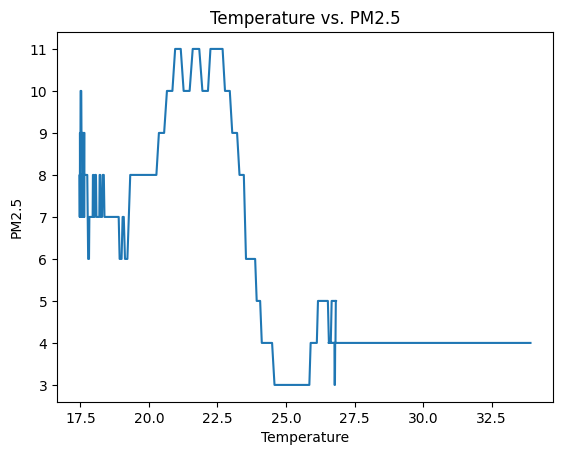

In [57]:
outdoors = pd.read_csv("OutsideData.csv")
Temperature = outdoors['Temperature']
PM25 = outdoors['PM2.5']

plt.plot(Temperature, PM25)
plt.xlabel('Temperature')
plt.ylabel('PM2.5')
plt.title('Temperature vs. PM2.5')